In [1]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
shoppers=pd.read_csv('Mall_Customers.csv')
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [3]:
shoppers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
shoppers.rename(columns={'Gender':'gender','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [7]:
shoppers.head()

,CustomerID,gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Step 4:  Visualize the data through Scatter plots for "pair-wise" combinations of the Features  
# Step 4a:  Specify the Features to be included in the Cluster Analysis  
features = ['Age', 'income', 'score']
feature_names = ['Age', '# income', 'score']
feature_longnames = ['Age', '# income', 'score']


IndexError: list index out of range

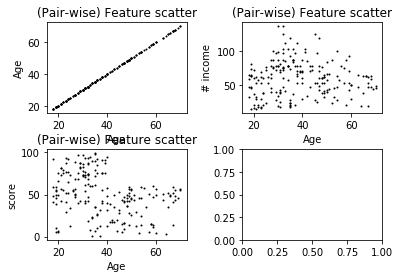

In [17]:
# Step 4b:  Draw Scatter plots for each "pair-wise" combination of the Features  
for i in np.arange (8):
	fig = plt.figure()
	fig.subplots_adjust (hspace=0.4, wspace=0.4)
	for j in np.arange (4):
		ax = fig.add_subplot (2, 2, j+1)
		ax.scatter (features [i], features [j], data=shoppers, c='k', s=1)
		ax.set_xlabel (feature_longnames [i])
		ax.set_ylabel (feature_longnames [j])
		ax.set_title ('(Pair-wise) Feature scatter')
	fig = plt.figure()
	fig.subplots_adjust (hspace=0.4, wspace=0.4)
	for j in np.arange (4):
		ax = fig.add_subplot (2, 2, j+1)
		ax.scatter (features [i], features [j+4], data=shoppers, c='k', s=1)
		ax.set_xlabel (feature_longnames [i])
		ax.set_ylabel (feature_longnames [j+4])
		ax.set_title ('(Pair-wise) Feature scatter')

In [18]:
X = np.array (shoppers [features])

In [19]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [20]:
# Step 5:  Prepare the data to be used for building the Cluster Analysis model  
# Step 5a:  Create arrays for the Features  
X = np.array (shoppers [features])
# Step 5b:  Calculate the means and the standard deviations for each of the Features  
mu = X.mean (axis=0)
sigma = X.std (axis=0)
# Step 5c:  Scale the data to be used for building the Cluster Analysis model  
Xs = (X - mu) / sigma

In [25]:
# Step 6:  Preserve the data scaling parameters in the form of a reusable Scale Matrix  
ScaleMatrix = pd.DataFrame()
ScaleMatrix ['Features'] = features
ScaleMatrix ['Mean'] = mu
ScaleMatrix ['StdDev'] = sigma
ScaleMatrix.to_csv ("Shopping_Mall_Scale Matrix.csv")
print ('Scale Matrix:')
print (ScaleMatrix)
print ('')

Scale Matrix:
  Features   Mean     StdDev
0      Age  38.85  13.934041
1   income  60.56  26.198977
2    score  50.20  25.758882



In [22]:
# Step 7:  Build the Cluster Analysis models for various numbers of clusters, ranging from a 1-Cluster model through a 12-Cluster model  
# Step 7a:  Define and/or initialize the cluster labels, etc  
n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
iter_cluster_labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6', 'Cluster-7', 'Cluster-8', 'Cluster-9', 'Cluster-10', 'Cluster-11', 'Cluster-12']
iter_cluster_sols = ['1-Cluster sol', '2-Cluster sol', '3-Cluster sol', '4-Cluster sol', '5-Cluster sol', '6-Cluster sol', '7-Cluster sol', '8-Cluster sol', '9-Cluster sol', '10-Cluster sol', '11-Cluster sol', '12-Cluster sol']
inertia = np.zeros (12)
size = np.zeros ((12,12))

In [23]:
# Step 7b:  Iterate the Cluster Analysis over the various numbers of clusters, ranging from a 1-Cluster model through a 12-Cluster model  
for i in np.arange (12):
	algorithm = KMeans (n_clusters=n_clusters [i], init='k-means++')
	model = algorithm.fit (Xs)
	labels = algorithm.labels_
	cluster_count = len (np.unique (labels))
	inertia [i] = algorithm.inertia_
	print ('K-Means - ', cluster_count, 'Clusters:', '% Variation | within:', 100*inertia [i]/inertia[0], '  versus  between:', 100 - 100*inertia[i]/inertia[0])
	for k in np.unique (labels):
		is_class_member = (labels==k)
		class_sample = X [is_class_member]
		size [i,k] = len (class_sample)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


K-Means -  1 Clusters: % Variation | within: 100.0   versus  between: 0.0
K-Means -  2 Clusters: % Variation | within: 64.8976981594062   versus  between: 35.102301840593796
K-Means -  3 Clusters: % Variation | within: 49.20204102592481   versus  between: 50.79795897407519
K-Means -  4 Clusters: % Variation | within: 34.20419124612653   versus  between: 65.79580875387347
K-Means -  5 Clusters: % Variation | within: 28.04126336259472   versus  between: 71.95873663740528
K-Means -  6 Clusters: % Variation | within: 22.31138893780931   versus  between: 77.68861106219069
K-Means -  7 Clusters: % Variation | within: 19.521767939207574   versus  between: 80.47823206079242
K-Means -  8 Clusters: % Variation | within: 17.35859705950836   versus  between: 82.64140294049164
K-Means -  9 Clusters: % Variation | within: 15.549668958260602   versus  between: 84.4503310417394
K-Means -  10 Clusters: % Variation | within: 13.614198750091493   versus  between: 86.38580124990851
K-Means -  11 Clusters:

In [26]:
# Step 8:  Explore the Cluster Analysis models for the various numbers of clusters  
# Step 8a:  Examine the sizes of the various clusters, for each iteration (i.e., ranging from a 1-Cluster model through a 12-Cluster model)  
ClusterSizes = pd.DataFrame()
ClusterSizes ['Solution'] = iter_cluster_sols
for p in np.arange(12):
	ClusterSizes [iter_cluster_labels [p]] = size [:,p] / len(Xs) * 100
ClusterSizes.to_csv ("Shopping_Mall_Cluster Sizes.csv")
print ('Cluster Sizes:')
print (ClusterSizes)
print ('')

Cluster Sizes:
          Solution  Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  \
0    1-Cluster sol      100.0        0.0        0.0        0.0        0.0   
1    2-Cluster sol       48.5       51.5        0.0        0.0        0.0   
2    3-Cluster sol       34.0       45.5       20.5        0.0        0.0   
3    4-Cluster sol       20.0       32.5       28.5       19.0        0.0   
4    5-Cluster sol       20.0       10.0       19.5       27.0       23.5   
5    6-Cluster sol       19.0       22.5       16.5       19.5       12.0   
6    7-Cluster sol       11.0       17.0       16.0       19.5       16.5   
7    8-Cluster sol       16.0       16.0       19.5        9.5       11.5   
8    9-Cluster sol       10.5       16.0       14.5       10.0       10.0   
9   10-Cluster sol       16.0        5.5       11.5       15.0        7.5   
10  11-Cluster sol       14.5       10.0        6.0       14.0       16.0   
11  12-Cluster sol        8.0       11.0       10.0        5.

In [37]:
# Step 8b:  Examine the variation in the intra-cluster homogeneity as well as the inter-cluster heterogeneity, as the number of clusters in the model increases  
withinss = 100 * inertia / inertia [0]
betweenss = 100 - withinss
Scree = pd.DataFrame()
Scree ['Solution'] = iter_cluster_sols
Scree ['% Within-Cluster variation'] = withinss
Scree ['% Between-Cluster variation'] = betweenss
Scree.to_csv ("Shopping_Mall_Scree.csv")
print ('Scree:')
print (Scree)
print ('')

Scree:
          Solution  % Within-Cluster variation  % Between-Cluster variation
0    1-Cluster sol                  100.000000                     0.000000
1    2-Cluster sol                   64.897698                    35.102302
2    3-Cluster sol                   49.202041                    50.797959
3    4-Cluster sol                   34.204191                    65.795809
4    5-Cluster sol                   28.041263                    71.958737
5    6-Cluster sol                   22.311389                    77.688611
6    7-Cluster sol                   19.521768                    80.478232
7    8-Cluster sol                   17.358597                    82.641403
8    9-Cluster sol                   15.549669                    84.450331
9   10-Cluster sol                   13.614199                    86.385801
10  11-Cluster sol                   11.995671                    88.004329
11  12-Cluster sol                   11.138944                    88.861056



In [38]:
features = ['Age', 'income', 'score']
feature_names = ['Age', '# income', 'score']
feature_longnames = ['Age', '# income', 'score']

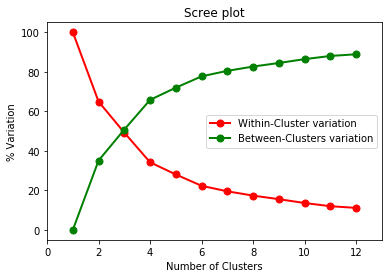

In [39]:
# Step 8c:  Visualize the variation in the intra-cluster homogeneity as well as the inter-cluster heterogeneity, as the number of clusters in the model increases  
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.plot (n_clusters, withinss, c='r', marker='o', markersize=7, linewidth=2, label='Within-Cluster variation')
ax.plot (n_clusters, betweenss, c='g', marker='o', markersize=7, linewidth=2, label='Between-Clusters variation')
ax.set_xlabel ('Number of Clusters')
ax.set_ylabel ('% Variation')
ax.set_title ('Scree plot')
ax.set_xlim (0, 13)
ax.set_ylim (-5, 105)
ax.legend (loc="best")

In [40]:
# Step 9:  Build the Cluster Analysis model, with 6 clusters  
# Step 9a:  Build the Cluster Analysis model  
algorithm = KMeans (n_clusters=6, init='k-means++')
model = algorithm.fit (Xs)

In [41]:
labels = algorithm.labels_
cluster_count = len (np.unique (labels))
print ('K-Means - ', cluster_count, 'Clusters')

K-Means -  6 Clusters


In [42]:
# Step 9c:  Capture (and "de-scale") the centroids of each of the clusters identified by the model  
centroids = algorithm.cluster_centers_
Centroids = (centroids * sigma) + mu
Centroids = Centroids.T

In [43]:
# Step 10:  Explore the results of the Cluster Analysis model  
# Step 10a:  Define the labels (i.e., the "identifiers") for the various clusters  
cluster_labels = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5', 'Cluster-6']

In [44]:
# Step 10b:  Preserve the "scaled" centroids of each of the clusters identified by the model, in the form of a reusable Cluster Model  
ClusterMODEL = pd.DataFrame()
ClusterMODEL ['Features'] = feature_names
centroids = centroids.T
for k in np.arange (cluster_count):
	ClusterMODEL [cluster_labels [k]] = centroids [:,k]
ClusterMODEL.to_csv ("Shopping_Mall_Cluster MODEL.csv")
print ('Cluster MODEL:')
print (ClusterMODEL)
print ('')

Cluster MODEL:
   Features  Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  Cluster-6
0       Age   0.478957   1.254721  -0.873098  -0.976027   0.221716  -0.441917
1  # income  -1.308230  -0.240213  -0.113785  -1.325497   1.083225   0.991583
2     score  -1.196444  -0.043998  -0.093580   1.037183  -1.290052   1.239503



In [45]:
# Step 10c:  Construct the Cluster Profiles matrix from the "de-scaled" centroids of each of the clusters identified by the model  
ClusterProfiles = pd.DataFrame()
ClusterProfiles ['Features'] = feature_names
for j in np.arange (cluster_count):
	ClusterProfiles [cluster_labels [j]] = Centroids [:,j]
ClusterProfiles.to_csv ("Shopping_Mall Profiles.csv")
print ('Cluster Profiles:')
print (ClusterProfiles)
print ('')

Cluster Profiles:
   Features  Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  Cluster-6
0       Age  45.523810  56.333333  26.684211  25.250000  41.939394  32.692308
1  # income  26.285714  54.266667  57.578947  25.833333  88.939394  86.538462
2     score  19.380952  49.066667  47.789474  76.916667  16.969697  82.128205



In [52]:
# Step 10d:  Compare the Cluster Profiles (i.e., the centroids of the various clusters) with the overall data  
try:
    ClusterProfilesRelative = pd.DataFrame()
    ClusterProfilesRelative ['Features'] = feature_names
    ClusterProfilesRelative ['Total'] = np.array (shoppers.mean())
    for i in np.arange (len (cluster_labels)):
        ClusterProfilesRelative [cluster_labels [i]] = ClusterProfiles [cluster_labels [i]]
    ClusterProfilesRelative.to_csv ("Shopping_Mall Profiles (Relative).csv")
    print ('Cluster Profiles (Relative):')
    print (ClusterProfilesRelative)
    print ('')
except Exception as e:
    print(e)

Length of values does not match length of index


In [53]:
# Step 10e:  Calibrate the Cluster Profiles (i.e., the centroids of the various clusters) as a proportion of the overall data  
try:
    
    ClusterProfilesRelativepct = pd.DataFrame()

    ClusterProfilesRelativepct ['Features'] = feature_names
    ClusterProfilesRelativepct ['Total'] = 100 * ClusterProfilesRelative ['Total'] / ClusterProfilesRelative ['Total']
    for i in np.arange (len (cluster_labels)):
        ClusterProfilesRelativepct [cluster_labels [i]] = 100 * ClusterProfilesRelative [cluster_labels [i]] / ClusterProfilesRelative ['Total']
        ClusterProfilesRelativepct.to_csv ("Shopping_Mall Profiles (Relative %).csv")
        print ('Cluster Profiles (Relative %)')
        print (ClusterProfilesRelativepct)
        print ('')
except Exception as e:
    print(e)

'Total'


In [59]:
try:
    
    
    mix = np.zeros (6)
    for k in np.unique (labels):
        is_class_member = (labels==k)
        class_sample = X [is_class_member]
        mix [k] = len (class_sample)
    ClusterMix = pd.DataFrame()
    ClusterMix ['Cluster #'] = cluster_labels
    ClusterMix ['% Observations'] = 100 * mix / len (Xs)
    ClusterMix.to_csv ("Shopping_Mall Mix.csv")
    print ('Cluster Mix:')
    print (ClusterMix)
    print ('')
except Exception as e:
    print(e)

Cluster Mix:
   Cluster #  % Observations
0  Cluster-1            10.5
1  Cluster-2            22.5
2  Cluster-3            19.0
3  Cluster-4            12.0
4  Cluster-5            16.5
5  Cluster-6            19.5



([<matplotlib.patches.Wedge at 0x4b69ef0>,
 [Text(1.0406938983799077, -0.35630914929991697, 'Cluster-1'),
  Text(0.22306606724899639, -1.0771450829122633, 'Cluster-2'),
  Text(-0.9801071438778458, -0.49938961394848014, 'Cluster-3'),
  Text(-0.9639373912137646, 0.5299289629940996, 'Cluster-4'),
  Text(-0.18912208538467948, 1.0836202456671573, 'Cluster-5'),
  Text(0.8999646441607303, 0.6325058412857941, 'Cluster-6')],
 [Text(0.5676512172981314, -0.19435044507268195, '10.5%'),
  Text(0.12167240031763438, -0.5875336815885072, '22.5%'),
  Text(-0.5346038966606431, -0.27239433488098913, '19.0%'),
  Text(-0.5257840315711443, 0.28905216163314523, '12.0%'),
  Text(-0.10315750111891607, 0.5910655885457221, '16.5%'),
  Text(0.49088980590585285, 0.3450031861558877, '19.5%')])

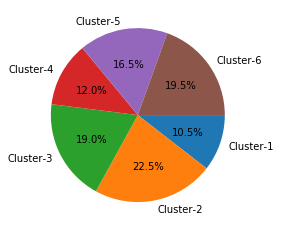

In [57]:
# Step 10g:  Visualize the sizes of the various clusters identified by the model  
fig = plt.figure()
ax = fig.add_subplot (1,1,1)
ax.pie ('% Observations', labels='Cluster #', data=ClusterMix, counterclock=False, autopct='%1.1f%%')

In [60]:
# Step 11:  Visualize the segregation of the values of the Features, across the various clusters identified by the model  
# Step 11a:  Tag each observation in the data with the label of the corresponding cluster, as identified by the model  
ClusterID = np.repeat ('          ', len (Xs))
for i in np.arange (len (Xs)):
	ClusterID [i] = cluster_labels [labels [i]]
shoppers ['ClusterID'] = ClusterID
shoppers.to_csv ("Shopping_Mall (Cluster IDs).csv")
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
CustomerID    200 non-null int64
gender        200 non-null object
Age           200 non-null int64
income        200 non-null int64
score         200 non-null int64
ClusterID     200 non-null object
dtypes: int64(4), object(2)
memory usage: 7.9+ KB


list index out of range


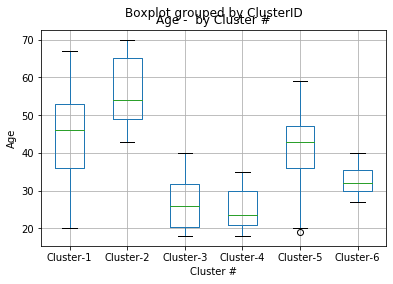

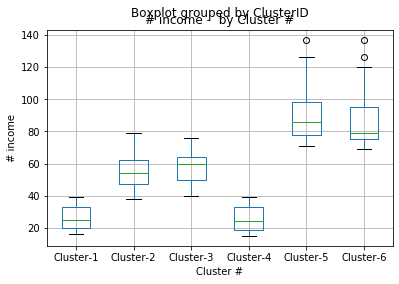

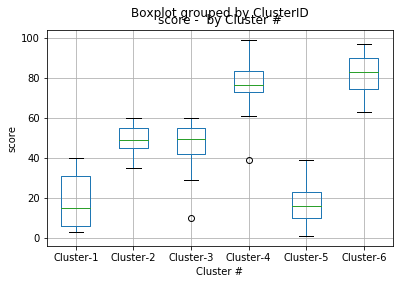

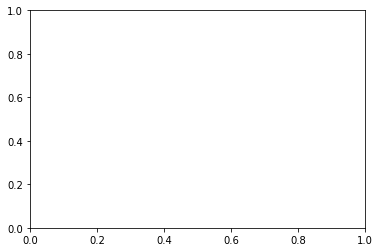

In [62]:
try:
    
    for i in np.arange (8):
        fig = plt.figure()
        ax = fig.add_subplot (1,1,1)
        shoppers.boxplot (features [i], by = 'ClusterID', ax=ax)
        ax.set_xlabel ('Cluster #')
        ax.set_ylabel (feature_longnames [i])
        ax.set_title (str (feature_longnames [i]) + ' -  by Cluster #')
except Exception as e:
    print(e)

In [63]:
# Step 11c:  Compare the Cluster Profiles (i.e., the centroids of the various clusters) with the average values of the Features (grouped by the various clusters identified by the model)  
cluster_means = shoppers [features].groupby (shoppers ['ClusterID']).mean()
cluster_means = cluster_means.T
print ('Cluster Centroids:')
print (cluster_means)
print ('')
print ('Cluster Profiles:')
print (ClusterProfiles)
print ('')

Cluster Centroids:
ClusterID  Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  Cluster-6
Age        45.523810  56.333333  26.684211  25.250000  41.939394  32.692308
income     26.285714  54.266667  57.578947  25.833333  88.939394  86.538462
score      19.380952  49.066667  47.789474  76.916667  16.969697  82.128205

Cluster Profiles:
   Features  Cluster-1  Cluster-2  Cluster-3  Cluster-4  Cluster-5  Cluster-6
0       Age  45.523810  56.333333  26.684211  25.250000  41.939394  32.692308
1  # income  26.285714  54.266667  57.578947  25.833333  88.939394  86.538462
2     score  19.380952  49.066667  47.789474  76.916667  16.969697  82.128205

